### Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 


### Importing Data

In [8]:
import pandas as pd

path = r"C:\Users\cerre\Desktop\work_with_this_dataset.csv"
df = pd.read_csv(path)

### Splitting and Scaling the Data

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# select features and target
features = df.drop(columns=["Target", "Trend"])
target = df["Target"]

# split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Linear Regression Model

Here, I train a **Linear Regression** model using the scaled training data. After training, the model is evaluated on the test set using three performance metrics:  
- **Mean Squared Error (MSE)** to measure average squared prediction error,  
- **Mean Absolute Error (MAE)** to measure average magnitude of errors,  
- **R² Score** to evaluate how well the model explains the variance in the data.  
This model provides a baseline for regression performance on our dataset.


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# train the model
lr_model = LinearRegression()
lr_model.fit(x_train_scaled, y_train)

# make predictions
y_pred_lr = lr_model.predict(x_test_scaled)

# evaluate the model
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("🔹 Linear Regression Results")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

🔹 Linear Regression Results
Mean Squared Error: 759.0464
Mean Absolute Error: 3.6159
R2 Score: 0.9904


 ### XGBoost Regression Model

In this block, we train an **XGBoost Regressor**, which is a more advanced machine learning model that typically performs better with complex patterns in data.

- We use `"reg:squarederror"` as the objective to minimize squared errors.
- After training, we evaluate the model using **MSE**, **MAE**, and **R² Score**, just like with Linear Regression.

This model helps us compare the performance of a baseline model (Linear Regression) versus a more sophisticated tree-based model (XGBoost).


In [17]:
from xgboost import XGBRegressor

# train the model
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_model.fit(x_train_scaled, y_train)

# make predictions
y_pred_xgb = xgb_model.predict(x_test_scaled)

# evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("🔹 XGBoost Regression Results")
print(f"Mean Squared Error: {mse_xgb:.4f}")
print(f"Mean Absolute Error: {mae_xgb:.4f}")
print(f"R2 Score: {r2_xgb:.4f}")

🔹 XGBoost Regression Results
Mean Squared Error: 1743.2317
Mean Absolute Error: 5.4650
R2 Score: 0.9779


### Target Variable Selection and Data Preprocessing

In this section, we change the regression target to `"close_mean_10_days"` to explore how models perform on a different financial indicator.

- **Target Selection**: `"close_mean_10_days"` is chosen as the new target variable.
- **Feature Separation**: All other columns are used as input features.
- **Data Splitting**: The dataset is split into training and testing sets using an 80/20 ratio.
- **Feature Scaling**: We apply `StandardScaler` to normalize the data, which is important for models like linear regression and XGBoost to perform optimally.

This step allows us to evaluate whether the model generalizes well on a different target variable, enhancing the robustness of our regression analysis.


In [19]:
target = "close_mean_10_days"

In [20]:
features = df.drop(columns=[target])
target_values = df[target]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target_values, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Conclusion:**  
Linear Regression outperformed XGBoost with lower error and higher R², showing that a simple model worked best for this dataset.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

MSE: 13.661242582214419
MAE: 0.800397287482735
R2 Score: 0.9998263793189257


In [24]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("R2 Score:", r2_score(y_test, y_pred_xgb))

MSE: 996.1266157058961
MAE: 3.054849212834576
R2 Score: 0.9873402305526509


### KMeans Clustering and PCA Visualization

In this section, I performed KMeans clustering on the numerical features of the dataset to identify hidden patterns or groupings. We standardized the features before clustering to ensure fair comparison. To visualize the clusters in two dimensions, I applied PCA and plotted the result using a scatter plot. Each point represents an observation colored by its assigned cluster.


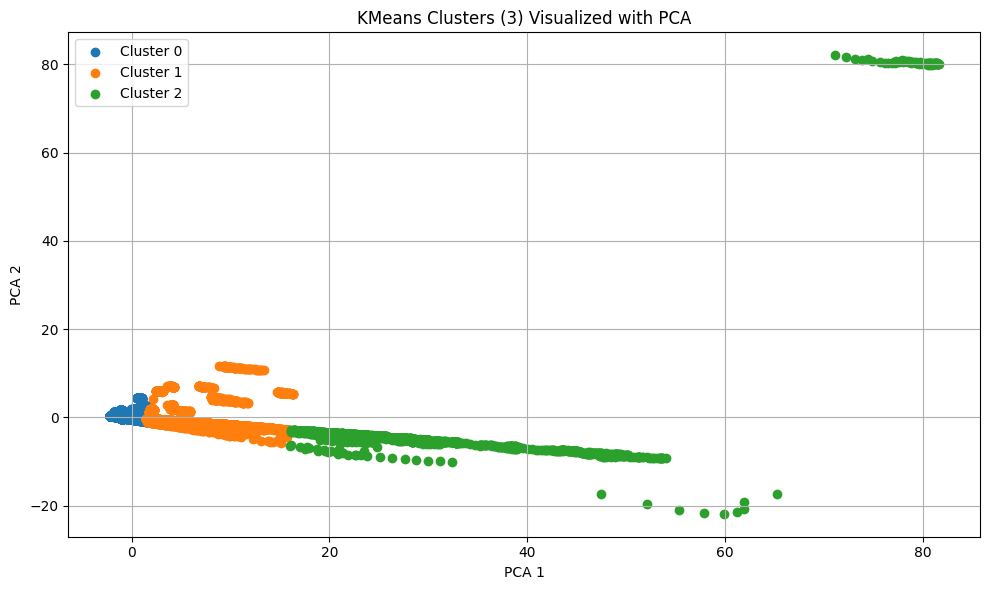

In [26]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\cerre\Desktop\work_with_this_dataset.csv")

# Select numerical features for clustering
features = df.select_dtypes(include=["float64", "int64"])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df["cluster"] = clusters

# Apply PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df["pca1"] = pca_result[:, 0]
df["pca2"] = pca_result[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in df["cluster"].unique():
    clustered = df[df["cluster"] == cluster]
    plt.scatter(clustered["pca1"], clustered["pca2"], label=f"Cluster {cluster}")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Clusters (3) Visualized with PCA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
